In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [220]:
df = pd.read_csv(r'C:\Users\Acer\Downloads\archive\used_cars.csv')


In [228]:
df.sample(8)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
3766,Subaru,Ascent Touring 7-Passenger,2020,"40,971 mi.",Gasoline,260.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Blue,Brown,None reported,Yes,"$32,500"
1335,Chevrolet,Suburban 1500 LTZ,2015,"217,500 mi.",Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,"$20,000"
2450,Lexus,GX 460 Luxury,2020,"37,366 mi.",Gasoline,4.6L V8 32V MPFI DOHC,6-Speed Automatic,White,–,NaN,NaN,"$51,890"
1049,Chevrolet,Tahoe LT,2017,"61,720 mi.",E85 Flex Fuel,5.3 Liter,Automatic,Silver,Jet Black,At least 1 accident or damage reported,NaN,"$39,998"
1631,Chevrolet,Camaro 2LT,2011,"126,700 mi.",Gasoline,312.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,At least 1 accident or damage reported,Yes,"$14,000"
2686,Porsche,911 Carrera 4 GTS,2023,"1,518 mi.",Gasoline,473.0HP 3.0L Flat 6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Beige,Brown,None reported,Yes,"$194,965"
1858,Ford,Bronco Sport Base,2022,"13,865 mi.",Gasoline,1.5L I3 12V PDI DOHC Turbo,8-Speed Automatic,Shadow Black,Ebony,None reported,Yes,"$29,182"
715,BMW,135 i,2009,"72,900 mi.",Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed A/T,Gray,Gray,None reported,Yes,"$15,500"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [7]:
df.describe()

,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


In [9]:
df.isna().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [10]:
df_clean = df.copy()

In [12]:
df_clean['price'] = (df_clean['price'].str.replace('$' , '' , regex=False)
                                     .str.replace(',' , '' , regex=False)
                                     .astype(float) )

In [39]:
df_clean['transmission'] = df_clean['transmission'].str.lower()

In [40]:
df_clean.loc[
    df_clean['transmission'].str.contains('cvt|variable', na=False),
    'transmission'
] = 'CVT'



df_clean.loc[
    df_clean['transmission'].str.contains('manual|m/t|mt', na=False),
    'transmission'
] = 'Manual'


df_clean.loc[
    df_clean['transmission'].str.contains(
        'automatic|auto|a/t|dual|dct|at|speed|single-speed|overdrive',
        na=False
    ),
    'transmission'
] = 'Automatic'



In [44]:
df_clean.loc[
    ~df_clean['transmission'].isin(['Automatic', 'Manual', 'CVT']),
    'transmission'
] = 'Other'


In [13]:
df_clean['milage'] = (df_clean['milage'].str.replace(',' , '' , regex=False)
                                        .str.replace('mi.' , '' , regex=False)
                                        .astype(float))

In [54]:
df_clean['kilometers'] = df_clean['milage'] * 1.60934 

In [55]:
df_clean['kilometers'] = df_clean['kilometers'].round(2)

In [68]:
df_clean = df_clean.drop('milage' , axis=1)

In [65]:
nan_col = ['fuel_type', 'accident', 'clean_title']

In [66]:
for i in nan_col:
    df_clean[i] = df_clean[i].fillna('Unknown')

In [186]:
(df_clean['fuel_type'] == 'not supported').sum()

170

In [81]:
df_clean = df_clean[df_clean['fuel_type'] != 'not supported']
df_clean.reset_index(drop=True, inplace=True)

In [93]:
df_clean = df_clean[df_clean['fuel_type'] != '–']
df_clean.reset_index(drop=True, inplace=True)

In [102]:
df_clean = df_clean.copy()
df_clean['fuel_type'] = df_clean['fuel_type'].str.replace('Plug-In Hybrid' , 'Hybrid')

In [187]:
df_clean = df_clean[df_clean['fuel_type'] != 'Unknown' ]
df_clean.reset_index(drop=True , inplace=True)

In [195]:
df_clean = df_clean[df_clean['transmission'] != 'Other' ]
df_clean.reset_index(drop=True , inplace=True)

In [205]:
df_clean = df_clean[df_clean['accident'] != 'Unknown' ]
df_clean.reset_index(drop=True , inplace=True)

In [118]:
new_column = ['brand', 'model', 'model_year', 'kilometers', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title','price']
df_clean = df_clean[new_column]

In [230]:
df_clean.head()

,brand,model,model_year,kilometers,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,82076.34,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,Automatic,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,55911.69,Gasoline,3.8L V6 24V GDI DOHC,Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
2,Lexus,RX 350 RX 350,2022,36004.15,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,Unknown,54598
3,INFINITI,Q50 Hybrid Sport,2015,143070.33,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,Automatic,Black,Black,None reported,Yes,15500
4,Audi,Q3 45 S line Premium Plus,2021,15827.86,Gasoline,2.0L I4 16V GDI DOHC Turbo,Automatic,Glacier White Metallic,Black,None reported,Unknown,34999


In [109]:
df_clean['price'] = df_clean['price'].astype(int)

In [110]:
df_clean

,brand,model,model_year,kilometers,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,82076.34,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,Automatic,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,55911.69,Gasoline,3.8L V6 24V GDI DOHC,Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
2,Lexus,RX 350 RX 350,2022,36004.15,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,Unknown,54598
3,INFINITI,Q50 Hybrid Sport,2015,143070.33,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,Automatic,Black,Black,None reported,Yes,15500
4,Audi,Q3 45 S line Premium Plus,2021,15827.86,Gasoline,2.0L I4 16V GDI DOHC Turbo,Automatic,Glacier White Metallic,Black,None reported,Unknown,34999
...,...,...,...,...,...,...,...,...,...,...,...,...
3957,Bentley,Continental GT Speed,2023,1149.07,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,Automatic,C / C,Hotspur,None reported,Yes,349950
3958,Audi,S4 3.0T Premium Plus,2022,17541.81,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Automatic,Black,Black,None reported,Yes,53900
3959,Porsche,Taycan,2022,3405.36,Unknown,Electric,Automatic,Black,Black,None reported,Unknown,90998
3960,Ford,F-150 Raptor,2020,53108.22,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,Automatic,Blue,Black,None reported,Yes,62999


In [124]:
df_clean.info()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
count,3962,3962,3962,3962,3962,3962,3962,3962,3962
unique,57,1872,5,1143,4,317,155,3,2
top,Ford,M3 Base,Gasoline,2.0L I4 16V GDI DOHC Turbo,Automatic,Black,Black,None reported,Yes
freq,381,30,3309,52,3485,900,2008,2875,3367


In [130]:
df_clean['price'].mean()

44668.6458859162

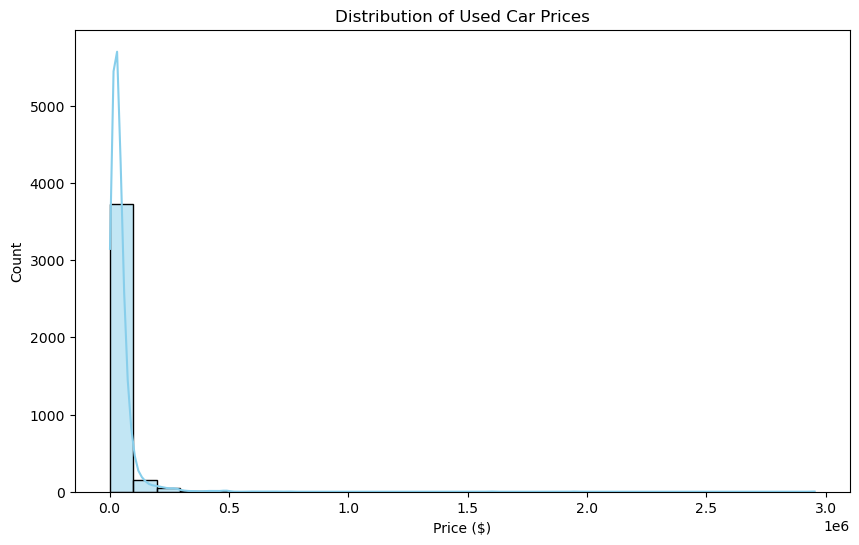

In [140]:
plt.figure(figsize=(10,6))
sns.histplot(df_clean['price'] , bins=30 , kde=True , color='skyblue')
plt.title('Distribution of Used Car Prices')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()

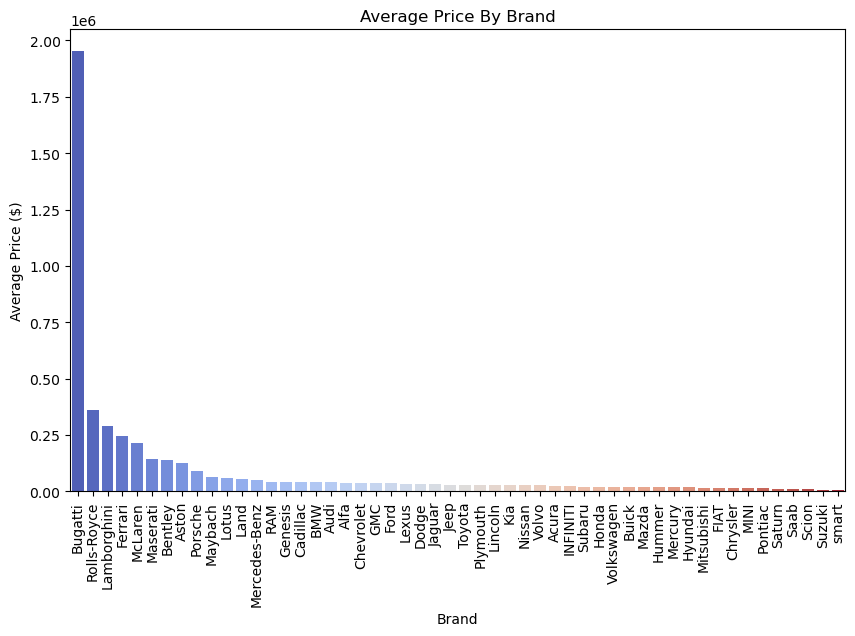

In [233]:
brand_price = df_clean.groupby('brand')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=brand_price.index , y=brand_price.values , palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Average Price By Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price ($)')
plt.show()

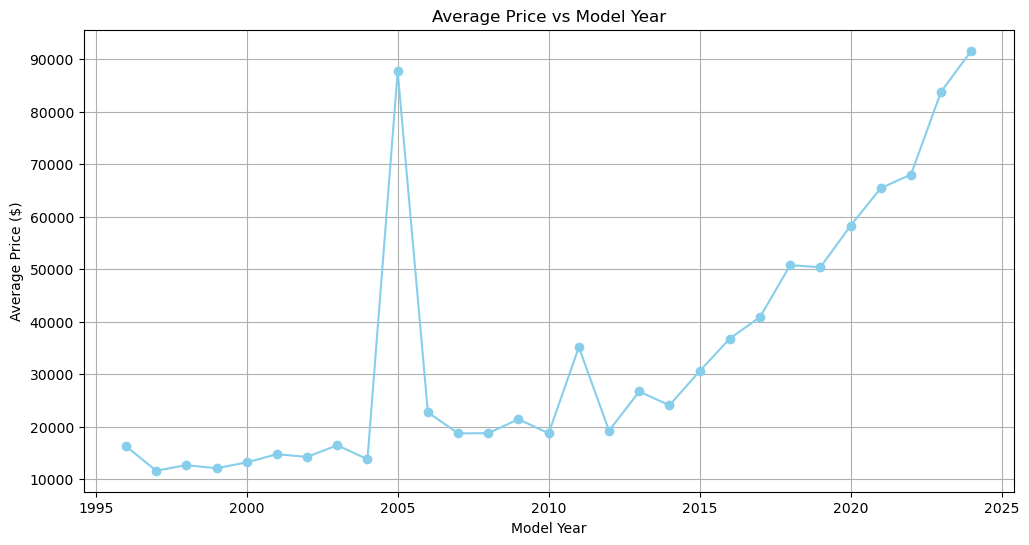

In [180]:
year_price = df_clean.groupby('model_year')['price'].mean()

plt.figure(figsize=(12,6))
plt.plot(year_price.index, year_price.values, marker='o', color='skyblue')
plt.title('Average Price vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()


In [193]:
df_clean['transmission'].value_counts()

Automatic    3315
Manual        365
CVT           104
Other           8
Name: transmission, dtype: int64

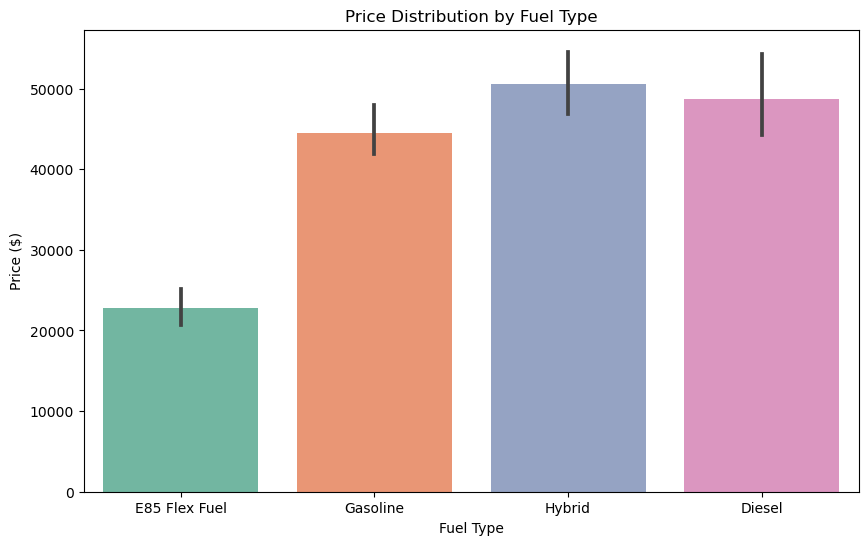

In [189]:
plt.figure(figsize=(10,6))
sns.barplot(x='fuel_type', y='price', data=df_clean, palette='Set2')
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price ($)')
plt.show()

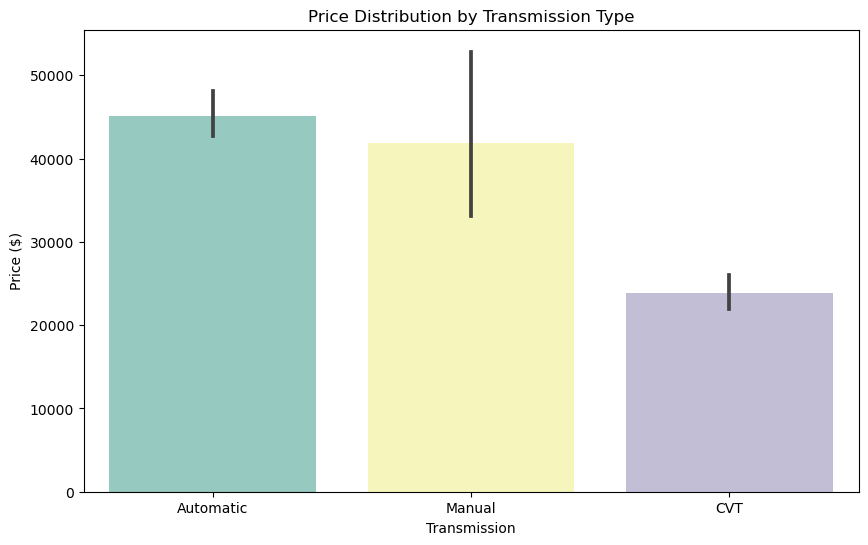

In [198]:
plt.figure(figsize=(10,6))
sns.barplot(x='transmission', y='price', data=df_clean, palette='Set3')
plt.title('Price Distribution by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Price ($)')
plt.show()

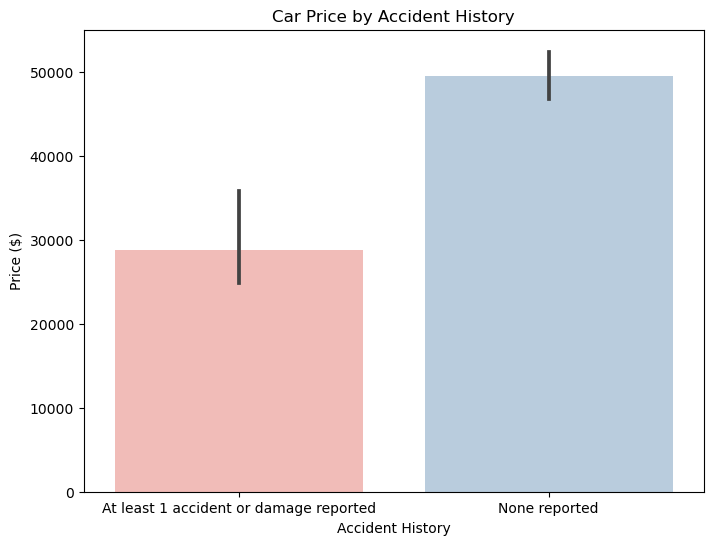

In [207]:
plt.figure(figsize=(8,6))
sns.barplot(x='accident', y='price', data=df_clean, palette='Pastel1')
plt.title('Car Price by Accident History')
plt.xlabel('Accident History')
plt.ylabel('Price ($)')
plt.show()

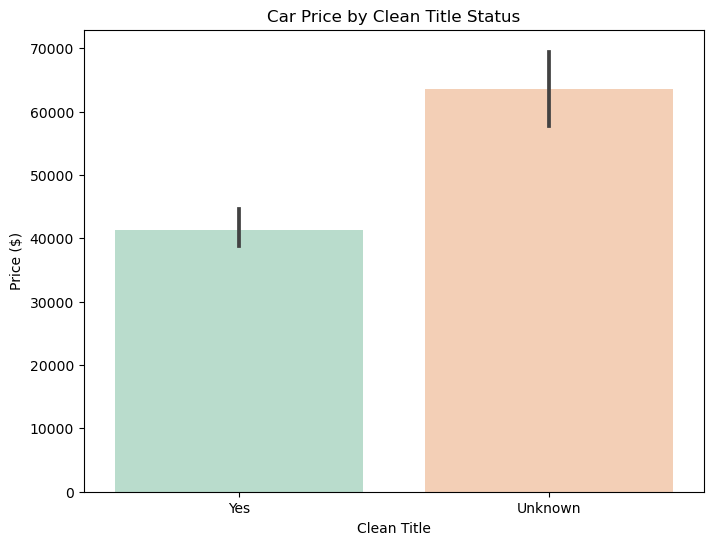

In [218]:
plt.figure(figsize=(8,6))
sns.barplot(x='clean_title', y='price', data=df_clean, palette='Pastel2')
plt.title('Car Price by Clean Title Status')
plt.xlabel('Clean Title')
plt.ylabel('Price ($)')
plt.show()


In [235]:
df_clean.to_csv('output.csv', index=False)
